![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def midpoint(f, a, b, n=1000):
    xs,h = np.linspace(a,b,num=n,endpoint=False,retstep=True)
    xs = xs + h/2
    return np.sum(f(xs))*h

def simpson(f, a, b, n=1000):
    if n % 2:
        n+=1

    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)

    return s * h / 3

In [12]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `np.divmod` (versão vetorizada da `divmod` do python).

In [13]:
def F(x):
    """Primitiva de |sin(x)|, exata até a precisão do computador."""
    a,b = np.divmod(x,np.pi)
    return a*2 - 1 -np.cos(b)

In [14]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [15]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

Explique as tolerâncias dos testes acima.

YOUR ANSWER HERE

In [16]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

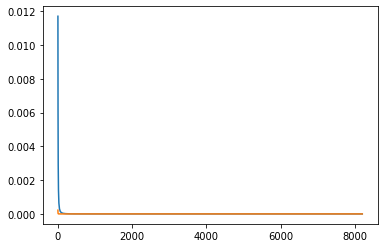

In [68]:
a, b = 0,3
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
ax = plt.gca()
errors_m = [np.abs(exact - midpoint(f,a,b,n)) for n in ns]
errors_s = [np.abs(exact - simpson(f,a,b,n)) for n in ns]
ax.plot(ns,errors_m,label="Midpoint")
ax.plot(ns,errors_s,label="Simpson")

In [69]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [70]:
ax = None

O que você observa neste gráfico?

YOUR ANSWER HERE

Agora, repita o gráfico para o intervalo $[0,6]$:

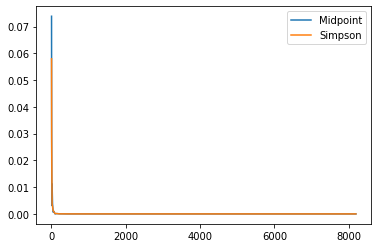

In [71]:
a , b = 0,6
exact = F(b) - F(a)
ax = plt.gca()
ns = np.logspace(3,13, num=20, dtype=int, base=2)
errors_m = [np.abs(exact - midpoint(f,a,b,n)) for n in ns]
errors_s = [np.abs(exact - simpson(f,a,b,n)) for n in ns]
ax.plot(ns,errors_m,label="Midpoint")
ax.plot(ns,errors_s,label="Simpson")
plt.legend()

In [72]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [73]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [74]:
min(l.get_ydata())

4.429432376440445e-09

In [ ]:
ax = None

Como esse gráfico é diferente do outro?

YOUR ANSWER HERE

## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.
Você pode assumir que x nunca vai ser uma das extremidades $a_k$.

In [107]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    if (x-a)*(x-b) > 0:
        return 
    h = (b - a) / n
    pts = np.linspace(a,b,n+1,endpoint=True)
    for i,pt in enumerate(pts):
        if pt < x and x < pts[i+1]:
            return [pt,pts[i+1]]
    

In [108]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [109]:
np.pi

3.141592653589793

In [110]:
np.linspace(0, 6, 11)

array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ])

In [111]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [112]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro que os métodos do ponto médio e de Simpson
vão dar quando integrarem o intervalo contendo a "descontinuidade" $\pi$,
em função de $n$.

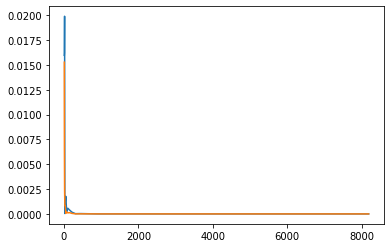

In [115]:
ax = plt.gca()
ns = np.logspace(3,13, num=20, dtype=int, base=2)
ax = plt.gca()
errors_m = []
errors_s = []
for n in ns:
    a, b = 0, 6
    a,b = I_x(a, b, np.pi, n)
    exact = F(b) - F(a)
    errors_m.append( np.abs(exact - midpoint(f,a,b,1)) )
    errors_s.append(np.abs(exact - simpson(f,a,b,1)))
ax.plot(ns,errors_m,label="Midpoint")
ax.plot(ns,errors_s,label="Simpson")

In [116]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [117]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [118]:
ax = None

## Questão 4: Um intervalo contra todos

Vamos ver quanto do erro de cada método é causado pelo erro em apenas um intervalo.

Faça um gráfico para comparar esses erros:
- à esquerda, os erros para o ponto médio
- à direita, os erros para o método de Simpson

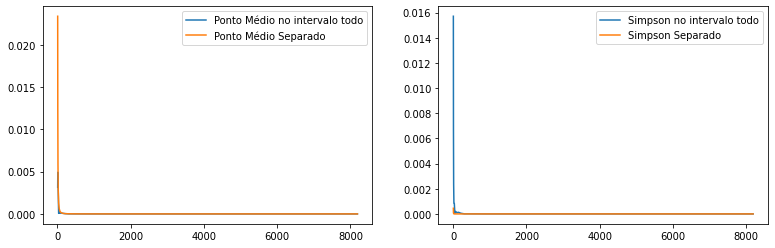

In [135]:
a, c, b = 0, np.pi, 6
exact = F(b) - F(a)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
ns = np.logspace(3,13, num=20, dtype=int, base=2)

err_simpsons = [np.abs(exact - simpson(f, a, b,  2*n)) for n in ns]
err_medios = [np.abs(exact - midpoint(f, a, b, 2*n)) for n in ns]

err_simpsons_sep = [np.abs(exact - (simpson(f, a, c,n) + simpson(f, c, b, n))) for n in ns]
err_medios_sep = [np.abs(exact - (midpoint(f, a, c, n) + midpoint(f, c, b, n))) for n in ns]

ax1.plot(ns, err_medios, label="Ponto Médio no intervalo todo")
ax1.plot(ns, err_medios_sep, label="Ponto Médio Separado")
ax1.legend()

ax2.plot(ns, err_simpsons, label="Simpson no intervalo todo")
ax2.plot(ns, err_simpsons_sep, label="Simpson Separado")
ax2.legend()



In [131]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2

In [132]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2

In [133]:
for l in ax1.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7
for l in ax2.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

AssertionError: 

In [134]:
min(l.get_ydata())

1.3322676295501878e-15

In [128]:
ax = None

O que você observa quanto aos erros dos métodos?

YOUR ANSWER HERE

## Questão 5: Integração com ajuda humana

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça dois gráficos comparando os erros dos 4 métodos:
- Um para o método do ponto médio, o outro para o método de Simpson
- Em cada um, o erro cometido por uma única integral e o erro cometido pela integral feita em 2 partes

Use o mesmo número $n$ **total** de sub-intervalos, para não "roubar" em favor do que quebra a integral em 2  :-)

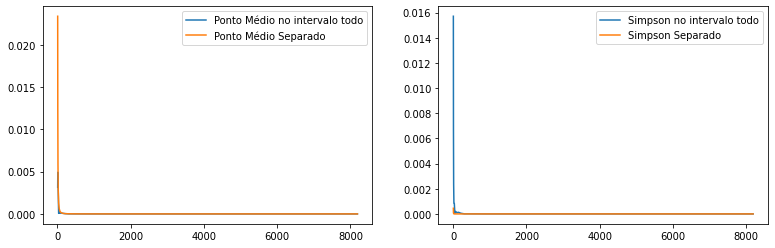

In [136]:
a, c, b = 0, np.pi, 6
exact = F(b) - F(a)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
ns = np.logspace(3,13, num=20, dtype=int, base=2)

err_simpsons = [np.abs(exact - simpson(f, a, b,  2*n)) for n in ns]
err_medios = [np.abs(exact - midpoint(f, a, b, 2*n)) for n in ns]

err_simpsons_sep = [np.abs(exact - (simpson(f, a, c,n) + simpson(f, c, b, n))) for n in ns]
err_medios_sep = [np.abs(exact - (midpoint(f, a, c, n) + midpoint(f, c, b, n))) for n in ns]

ax1.plot(ns, err_medios, label="Ponto Médio no intervalo todo")
ax1.plot(ns, err_medios_sep, label="Ponto Médio Separado")
ax1.legend()

ax2.plot(ns, err_simpsons, label="Simpson no intervalo todo")
ax2.plot(ns, err_simpsons_sep, label="Simpson Separado")
ax2.legend()



In [137]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.get_title != ""

In [138]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2
assert ax2.get_title != ""

In [139]:
ax = None

O que você observa?
O que você conclui?

YOUR ANSWER HERE